# PART 1


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx

#### Let's do a gentle start and use the random library generate 5000 data points from a Gaussian distribution with mu=2 and sigma=0.125
hej


In [3]:

data_points = np.array([])
mu = 2
sigma = 0.125

for i in range(0,5000):
    d = random.gauss(mu,sigma)
    data_points = np.append(data_points, d)



#### Now, let's use numpy.histogram to bin those number into 10 bins. What does the numpy.histogram function return? Do the two arrays have the same length?

In [ ]:


count, bin = np.histogram(data_points)
print(len(count))  # den første return counter antal værdier i en bin
print(len(bin))

#### Then we use matplotlib.pyplot.plot to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.

begge nedenstående betoder kan bruges
plt.stairs(count,bin)

In [ ]:
plt.hist(bin[:-1], bin, weights = count)
print(bin)
print(bin[:-1])

In [ ]:
# Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from 
# a Poisson distribution. As it turns out  numpy also has some convenient random number generators. Use numpy.random.poisson 
# to generate 5000 numbers drawn from a Poisson distribution characterized by lambda = 10. Find the maximum and minimum value 
# of your 5000 random numbers

data_points_poisson = np.array([])
lambd = 10

for i in range(0,5000): 
    d = np.random.poisson(lambd)
    data_points_poisson = np.append(data_points_poisson,d)

print(data_points_poisson, len(data_points_poisson))

max = max(data_points_poisson)
min = min(data_points_poisson)

print("min =", min, "max =", max)

In [ ]:
# Instead of simply specifying the number of bins for numpy.histogram, let's specify the bins we want using a vector.
# Create a vector v that results in a binning that puts each integer value in its own bin and where the first bin contains 
# the minimum number you found above, and the last bin contains the maximum number. Use the vector by setting numpy.histogram's 
# bin parameter as bin = . What is the sum over bin counts? Explain how the binning-vectors first and last element relates to 
# the min and max from the Poisson distribution.

bin_poission = np.arange(27)

count, bins_poi = np.histogram(a = data_points_poisson, bins = bin_poission)

count_sum = sum(count)
print(data_points_poisson)
print(bin_poission, "\n", len(bins_poi))
print(count, "\n",len(count))


# Now, use a bar chart (matplotlib.pyplot.bar) to plot the distribution

# plt.bar(bins_poi, count )


In [ ]:

# Binning and plotting degree distributions.
# Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above.

# First we have to figure out which values the ER parameters (N and p) should assume. It's easy to see that N=5000, but 
# how do you find ? 
# Hint: The parameter lambda in the Poisson distribution corresponds to the average degree, so you have to find a p that results 
# in an average degree, <k>=10. And you know that <k>=p(N-1), which will give you .

N = 5000
k = 10
p = k/(N-1)
Graph_er = nx.erdos_renyi_graph(N,p)

degree_distr = np.array([])

for node in Graph_er.nodes:
    degree = Graph_er.degree(node)
    degree_distr = np.append(degree_distr, degree)

max_degree = np.max(degree_distr)
degrees = np.arange(max_degree+1)
nodes_w_degree = np.arange(max_degree+1)

for node in Graph_er.nodes:
    degree = Graph_er.degree(node)
    nodes_w_degree[degree] = nodes_w_degree[degree] + 1


plt.bar(degrees,nodes_w_degree)



# Now, use networkx to create the graph and extract the degree distribution.
# Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. 
# Make sure that it looks like the Poisson distribution you plotted above.

# Part 3
First, let's use networkx to play around with WS graphs. Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity  and . Calculate the average shortest path length  for each one. Describe what happens to the network when .

In [ ]:
import networkx as nx
import math

graph1 = nx.watts_strogatz_graph(500,4,0)
graph2 = nx.watts_strogatz_graph(500,4,0.1)
graph3 = nx.watts_strogatz_graph(500,4,1)

# <d> = (lnN)/(lnk)
# k = p(N-1)
# da ln(0) = undefined vil vi ikke kunne beregne d for den første graf, denne vil bare være nul

print("avg shortest path length for graph 1 is", nx.average_shortest_path_length(graph1))

print("avg shortest path length for graph 2 is", nx.average_shortest_path_length(graph2))
print("avg shortest path length for graph 3 is",nx.average_shortest_path_length(graph3))

# for graph 3 vil d være ca 4.8. hermed ser vi at jo tættere sandsynligheden p kommer på 100% jo miindre vil < d > blive, fordi flere nodes vil være connected med hinadne

Let's investigate this behavior in detail. Generate 50 networks with N=500, < k >=4, for each of p={0,0.01,0.03,0.05,0.1,0.2}. Calculate the average of < d > as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 500
k = 4
no_graphs = 50

def create_50_graphs(p):
    avgd = np.array([])
    for i in range(no_graphs):
        graph = nx.watts_strogatz_graph(N,k,p)
        avgd = np.append(avgd,np.array([nx.average_shortest_path_length(graph)]))
    avg_avgd = np.mean(avgd)
    std = np.std(avgd)
    return avg_avgd,std

x = np.array([0,0.01,0.03,0.05,0.1,0.2])
y = np.array([])
error = np.array([])
for e in x:
   avgd, std = create_50_graphs(e)
   y = np.append(y,np.array([avgd]))
   error = np.append(error,np.array([std]))
print(x)
print(y)
print(error)
plt.errorbar(x,y,error)



# PART 4


In [ ]:
import networkx as nx 

def barbassi(r):
    G = nx.Graph()
    G.add_edge(0,1)
    import random
    for i in range(2,r):
        liste = []
        for x in list(G.edges()):
            liste.append(x[0])
            liste.append(x[1])
        G.add_edge(i,random.choice(liste))
    return G

In [ ]:
G = barbassi(200)
degrees4 = []
for x in list(G.degree):
    degrees4.append(x[1])

In [ ]:
nx.draw(G)

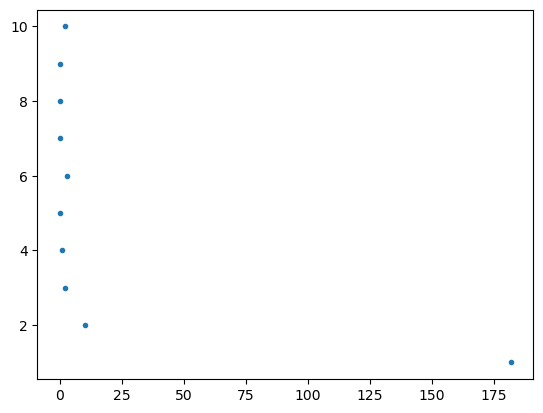

In [ ]:
import matplotlib.pyplot as plt
import math
GNew = barbassi(200)
newlist = []
for x in list(GNew.degree):
    newlist.append(x[1])
counts,bins=np.histogram(newlist)
plt.plot(counts,[1,2,3,4,5,6,7,8,9,10],linestyle = " ",marker = ".")
#didnt work

In [ ]:
import random
import numpy as np
generated=[]
for x in range(5000):
    generated.append(random.gauss(2,0.125))
counts1,bins2=np.histogram(generated)

In [ ]:
print(len(counts1))
print(len(bins2))

10
11


In [ ]:
newBins = []
for x in range(len(bins2)-1):
    newBins.append((list(bins2)[x]+list(bins2)[x+1])/2)

<BarContainer object of 10 artists>

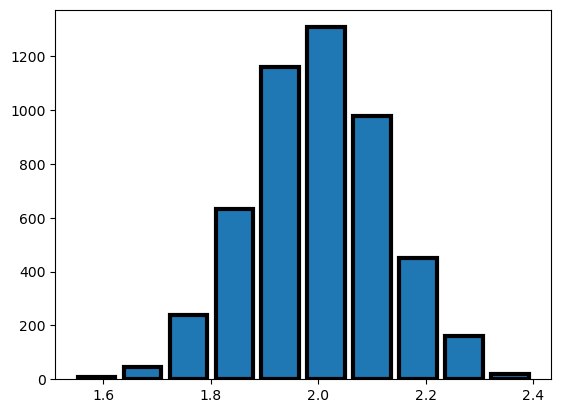

In [ ]:
import matplotlib.pyplot as plt
plt.bar(newBins,counts1,width=[0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07],edgecolor="black",linewidth=3)

In [ ]:
print(newBins)

[1.5391657457540375, 1.633698917747044, 1.7282320897400503, 1.8227652617330565, 1.917298433726063, 2.0118316057190695, 2.1063647777120753, 2.200897949705082, 2.2954311216980887, 2.3899642936910945]


# PART 5
(G er fra part 4)

In [ ]:
dic = []
for x in range (1000):
    i = random.choice(list(G.nodes()))
    new = {"i" : i,
           "degrees" : G.degree[i]}
    new["neighbors"] = nx.average_neighbor_degree(G)[i]
    dic.append(new)

In [ ]:
n = 0
for x in dic:
    if x['degrees']<x['neighbors']:
        n += 1

In [ ]:
n

In [ ]:
nx.is_connected(G)

In [ ]:
nx.graph

# PART 6


Next, we will create configuration-model networks with degree distributions of our own choice. Follow the recipe below for success



* Extract the degree sequence for the 100-node Barabasi-Albert network you created in Part 4 above. Create the configuration-model network with an algorithm you have coded on your own and include this algorithm as part of your answer to this exercise (so don't use the built-in NetworkX function, but the one you created during week 3).

* creating the algorithm

In [ ]:
import numpy as np

In [ ]:
def configuration_model (degrees) :
    
    halfedges = [] # a list of halfedges
    
    # Now append integer i to `halfedges` k times if the ith entry of degrees is equal to k:
    # STEP ONE GOES HERE..
    for i in range(len(degrees)):
        for k in range(degrees[i]):
            halfedges.append(i)
    # STEP ONE ENDS HERE
    print("Check if the following ouput matches what you expect 'halfedges' to look like")
    print(halfedges)
    
    # Shuffle the list halfedges
    # STEP TWO GOES HERE..
    np.random.shuffle(halfedges)
    # STEP TWO ENDS HERE    
    # Append the resulting edges to the list `edgelist` as tuples 
    # [that is, append (i,j) if i and j should be connected by and edge]
    
    edgelist = [] # This will contain tuples (i,j) indicating edges between nodes i and j.    
    # STEP THREE GOES HERE..
    for i in range(0,len(halfedges),2):
        edgelist.append((halfedges[i],halfedges[i+1]))
    # STEP THREE ENDS HERE    

    return edgelist #Return list of tuples indicating edges
        

In [ ]:
edgeslist = configuration_model([2,2,3,3])
import networkx as nx
G2 = nx.MultiGraph()
G2.add_edges_from(edgeslist)

Check if the following ouput matches what you expect 'halfedges' to look like
[0, 0, 1, 1, 2, 2, 2, 3, 3, 3]


[0, 0, 0, 0, 0]

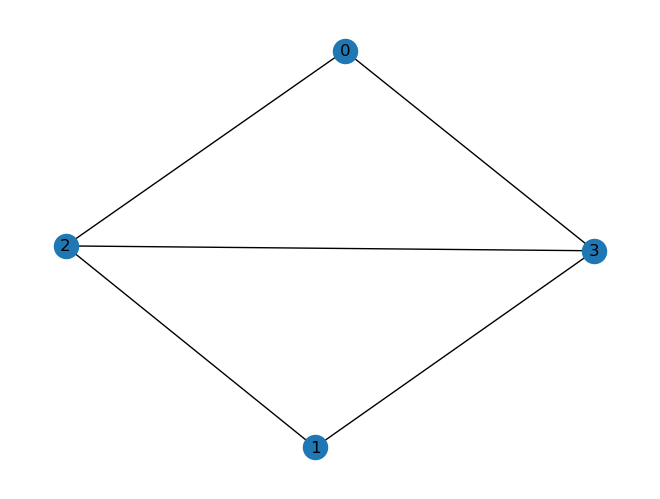

In [ ]:
nx.draw(G2, with_labels = True)

peculiar: cant always tell if its good cuz cant draw multigraph lol, unsure if it would work for every size graph due to the fact every second is looked at so what if the halfedges list somehow were a length where it didnt work. Also sometimes the graph isn't connected since its random

In [ ]:
G200 = nx.MultiGraph()
G200.add_edges_from(configuration_model([6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6]))


Check if the following ouput matches what you expect 'halfedges' to look like
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 4

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
checklist = []
for x in list(G200.degree()):
    checklist.append(x[1])
len(checklist) == list.count(checklist,6)
#alle har degree 6

True

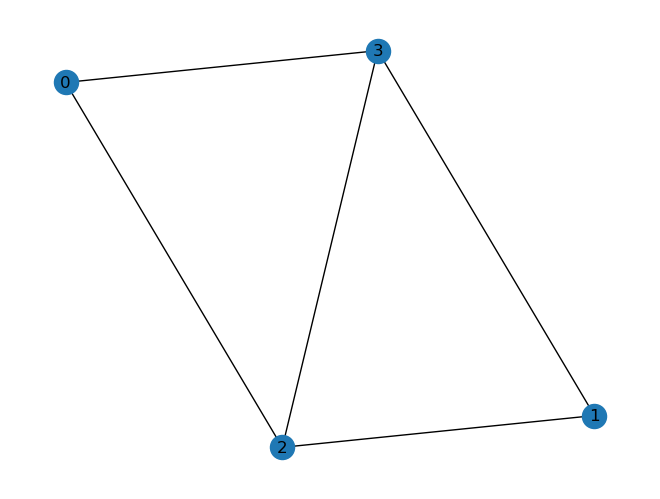

In [ ]:
G4 = nx.configuration_model([2,2,3,3])
nx.draw(G4,with_labels = True)

* Plot the network using NetworkX. When you compare this network to your Barabasi-Albert network visually, what differences do you notice?

In [ ]:
G2 = nx.MultiGraph()
G2.add_edges_from(configuration_model(degrees4))

Check if the following ouput matches what you expect 'halfedges' to look like
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 13, 14, 15, 15, 16, 16, 16, 16, 16, 17, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 21, 21, 21, 21, 22, 23, 24, 25, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33, 33, 34, 34, 34, 34, 34, 35, 36, 37, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 41, 41, 41, 42, 42, 43, 43, 43, 44, 44, 45, 45, 45, 46, 47, 48, 48, 49, 50, 50, 50, 51, 51, 51, 52, 53, 54, 55, 55, 56, 56, 57, 58, 58, 58, 58, 59, 60, 60, 60, 61, 62, 63, 63, 64, 65, 66, 67, 67, 67, 67, 68, 69, 69, 70, 70, 71, 72, 72, 73, 74, 74, 74, 74, 74, 75, 75, 75, 75, 76, 77, 77,

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

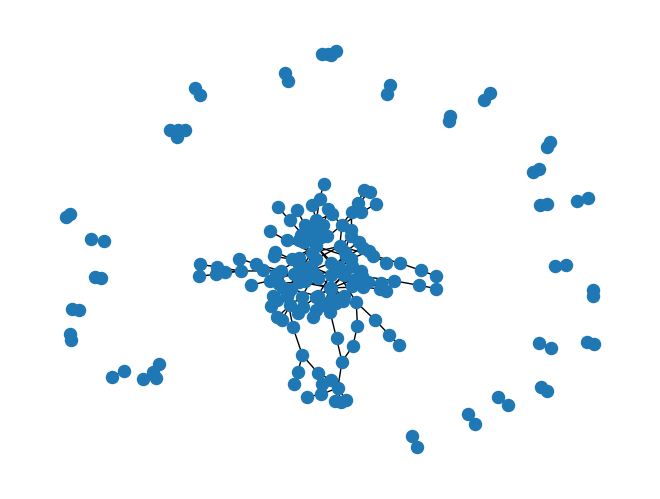

In [ ]:
nx.draw(G2,node_shape = ".")


Some nodes are disconnected which they are not in the other network

Create a 5000-node configuration-model network, where half of the nodes have degree 3 and the other half have degree 5. Again, create the network using the function you coded in Week 3, and not using the NetworkX function.

In [ ]:
listOfdegrees=[]
for x in range(5000):
    if x < 2500:
        listOfdegrees.append(3)
    else:
        listOfdegrees.append(5)
import random
random.shuffle(listOfdegrees)
G5000 = nx.MultiDiGraph()
G5000.add_edges_from(configuration_model(listOfdegrees))

Check if the following ouput matches what you expect 'halfedges' to look like
[0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33, 34, 34, 34, 35, 35, 35, 36, 36, 36, 36, 36, 37, 37, 37, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 45, 45, 45, 46, 46, 46, 46, 46, 47, 47, 47, 48, 48, 48, 49, 49, 49, 50, 50, 50, 51, 51, 51, 52, 52, 52, 52, 52, 53, 53, 53, 53, 53, 54, 54, 54, 55, 55, 55, 55, 55, 56, 56, 56,

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


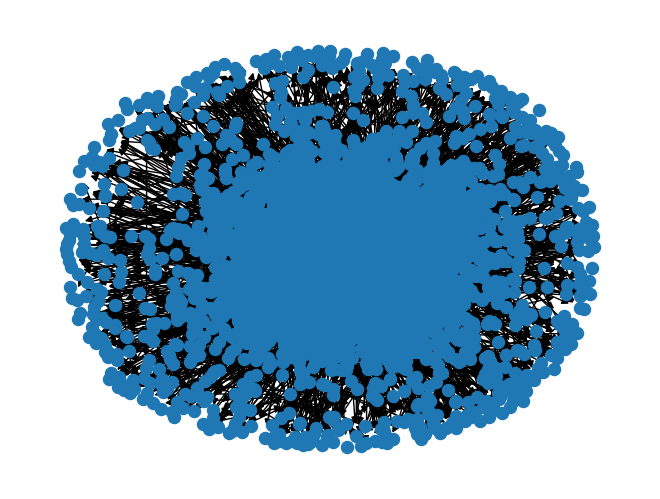

In [ ]:
nx.draw(G5000,node_shape = ".")

* What should the sum of node degrees be if all nodes had degrees as described in the exercise?

In [ ]:
3*2500+5*2500

20000

* Calculate and print the sum of node degrees and plot the binned degree distribution nicely. If the node degrees are not exactly as described in the exercise (half having degree 3, the other half degree 5), explain what might have caused this difference in node degrees.

In [ ]:
sum = 0
five = 0
other = 0
three = 0
for x in list(G5000.degree):
    if x[1]==5:
        five += 1
    elif x[1]==3:
        three += 1
    else:
        other +=1
    sum+=x[1]
print(sum)
print(five)
print(three)
print(other)

20000
2500
2500
0


When I first ran this I found there was a difference but it turned out that I had created the degree input list incorrectly and after I fixed that it fits

Im gonna try to plot G's distribution again: